<a href="https://colab.research.google.com/github/pranay2281/ML-Projects/blob/main/Tensorflow/Image%20Recognition/U%20Net%20-%20Cell%20Counting/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls 'gdrive/MyDrive/Colab Notebooks'

cats_vs_dogs.ipynb  kaggle.ipynb	project.ipynb
convolution.ipynb   keras.ipynb		test_images.npz
data_aug.ipynb	    keras_review.ipynb	X_and_y.npz


In [ ]:
import numpy as np
npztrain = np.load('gdrive/MyDrive/Colab Notebooks/X_and_y.npz')
X = npztrain['X']
y = npztrain['y']

In [ ]:
X.shape

(2000, 128, 128)

In [ ]:
import sklearn as sk
import sklearn.model_selection

X_train,X_val,y_train,y_val = sk.model_selection.train_test_split(X,y)

In [ ]:
import tensorflow as tf

data_train = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(16)
data_val = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(16)


In [ ]:
for img, mask in data_train:
  print('img.shape is: ',img.shape)
  print('mask.shape is: ', mask.shape)
  break
  

img.shape is:  (16, 128, 128)
mask.shape is:  (16, 128, 128)


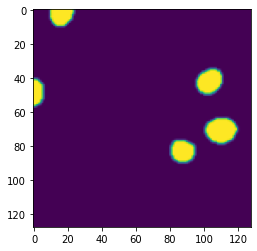

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mask[0])

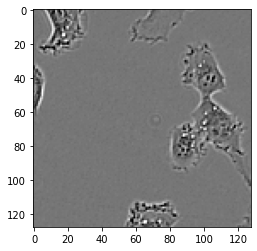

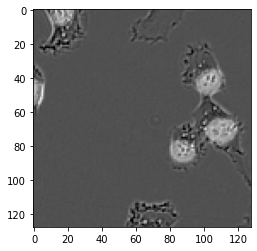

In [ ]:
plt.imshow(img[0]/255, cmap='gray')
plt.figure()
plt.imshow(img[0]/255+ 0.5*mask[0], cmap = 'gray')

In [ ]:
img.shape #128,128 because grayscale otherwise will have 3 or something

TensorShape([16, 128, 128])

In [ ]:
#inputs = tf.keras.Input(shape=(128,128,1))

#a = tf.keras.layers.RandomRotation(0.1)(inputs)
#a = tf.keras.layers.RandomZoom(0.2)(a)
#outputs = tf.keras.layers.RandomFlip(mode='horizontal')(a)

#data_augmentation = tf.keras.Model(inputs,outputs)

#image is 2d convolution

inputs = tf.keras.Input(shape=(128,128,1))
#x = data_augmentation(inputs)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu',padding = 'same')(inputs)
x_premax = tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu',padding = 'same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x_premax)

#x_premax.shape
x.shape

TensorShape([None, 64, 64, 64])

In [ ]:
y = tf.keras.layers.Conv2D(filters = 128, kernel_size =(3,3), activation = 'relu',padding = 'same')(x)
y_premax = tf.keras.layers.Conv2D(filters = 128, kernel_size =(3,3), activation = 'relu',padding = 'same')(y)
y = tf.keras.layers.MaxPool2D(pool_size=(2,2))(y_premax)

y_premax.shape
#y.shape

TensorShape([None, 64, 64, 128])

In [ ]:
z = tf.keras.layers.Conv2D(filters = 256, kernel_size =(3,3), activation = 'relu',padding = 'same')(y)
z_premax = tf.keras.layers.Conv2D(filters = 256, kernel_size =(3,3), activation = 'relu',padding = 'same')(z)
z = tf.keras.layers.MaxPool2D(pool_size=(2,2))(z_premax)

z_premax.shape
#z.shape

TensorShape([None, 32, 32, 256])

In [ ]:
w = tf.keras.layers.Conv2D(filters = 512, kernel_size =(3,3), activation = 'relu',padding = 'same')(z)
w_premax = tf.keras.layers.Conv2D(filters = 512, kernel_size =(3,3), activation = 'relu',padding = 'same')(w)
w = tf.keras.layers.MaxPool2D(pool_size=(2,2))(w_premax)

w_premax.shape
#w.shape


TensorShape([None, 16, 16, 512])

In [ ]:
v = tf.keras.layers.Conv2D(filters = 1024, kernel_size = (3,3),activation = 'relu',padding = 'same')(w)
v = tf.keras.layers.Conv2D(filters = 1024, kernel_size = (3,3),activation = 'relu',padding = 'same')(v)
v.shape

TensorShape([None, 8, 8, 1024])

In [ ]:
wHat = tf.keras.layers.UpSampling2D(size=(2,2))(v)
wHat = tf.keras.layers.Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same')(wHat)
wHat = tf.keras.layers.concatenate([w_premax,wHat])
wHat = tf.keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same')(wHat)
wHat = tf.keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same')(wHat)

wHat.shape

TensorShape([None, 16, 16, 512])

In [ ]:
zHat = tf.keras.layers.UpSampling2D(size=(2,2))(wHat)
zHat = tf.keras.layers.Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same')(zHat)
zHat = tf.keras.layers.concatenate([z_premax,zHat])
zHat = tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(zHat)
zHat = tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(zHat)


zHat.shape

TensorShape([None, 32, 32, 256])

In [ ]:
yHat = tf.keras.layers.UpSampling2D(size=(2,2))(zHat)
yHat = tf.keras.layers.Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same')(yHat)
yHat = tf.keras.layers.concatenate([y_premax,yHat])
yHat = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(yHat)
yHat = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(yHat)


yHat.shape

TensorShape([None, 64, 64, 128])

In [ ]:
xHat = tf.keras.layers.UpSampling2D(size=(2,2))(yHat)
xHat = tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same')(xHat)
xHat = tf.keras.layers.concatenate([x_premax,xHat])
xHat = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(xHat)
xHat = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(xHat)


xHat.shape

TensorShape([None, 128, 128, 64])

In [ ]:
outputs = tf.keras.layers.Conv2D(filters = 1, kernel_size = (1,1),activation='sigmoid',padding = 'same')(xHat)
model = tf.keras.Model(inputs = inputs, outputs = outputs) 


In [ ]:

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4) ,loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(data_train, epochs=5,validation_data = data_val)

Epoch 1/5
48/94 [==============>...............] - ETA: 12s - loss: 0.6461 - accuracy: 0.6727

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.legend()

In [ ]:
npztest = np.load('gdrive/MyDrive/Colab Notebooks/test_images.npz')
y_test = npztest['X']

count = []

pred_mask = model.predict(y_test)
pred_mask = pred_mask.round()
pred_mask = pred_mask.astype(np.uint8)

import cv2


In [ ]:
for idx in range(2000):
  img = pred_mask[idx,:,:,0]
  ct,_ = cv2.connectedComponents(img)
  count.append(ct)

In [ ]:
index = []
for i in range(2000):
  index.append(i)

In [ ]:
import pandas as pd
kaggle_submission = pd.DataFrame(index, columns=["index"])
kaggle_submission['count'] = count
fname_submission = 'unet_kaggle_123.csv'
kaggle_submission.to_csv(fname_submission, index = False)


In [ ]:
#data augmentation 
#library imgaug